# Predicting store sales using Simple Moving average

In [1]:
import pandas as pd

In [34]:
df = pd.read_excel('online_retail.xlsx')

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Starting EDA to have only the values we need

In [36]:
## First calculating the amount for the item 
df['price'] = (df['Quantity'] * df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [37]:
import datetime as datetime

In [38]:
df = df.rename(columns={'InvoiceDate':'Date'})

In [39]:
#taking only columns that we need
df = df[['Date','price']]
df.head()

,Date,price
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


Lets look at whats the range of whole data and see if anything is missing

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    541909 non-null  datetime64[ns]
 1   price   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 MB


all the values are non null.
lets check from which date to last date we have the data 

In [41]:
df.Date.min(),df.Date.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

we have the data from dec 2010 to nov 2011 that is complete and incomplete data for dec 2011.
Lets train the model from dec 2010 to oct 2011 and check for nov 2011 then we will do testing with nov 2011 and final validation on dec 2011. 

Final Summary - 
1. Training -> dec 2010 to nov 2011
2. Testing -> nov 2011
3. Validation -> dec 2011

In [42]:
df.Date = pd.to_datetime(df['Date']).dt.normalize()
df

,Date,price
0,2010-12-01,15.30
1,2010-12-01,20.34
2,2010-12-01,22.00
3,2010-12-01,20.34
4,2010-12-01,20.34
...,...,...
541904,2011-12-09,10.20
541905,2011-12-09,12.60
541906,2011-12-09,16.60
541907,2011-12-09,16.60


In [43]:
df_daily_sum = df.groupby('Date')['price'].sum().reset_index()

In [46]:
df_daily_sum = df_daily_sum.set_index('Date')

<Axes: xlabel='Date'>

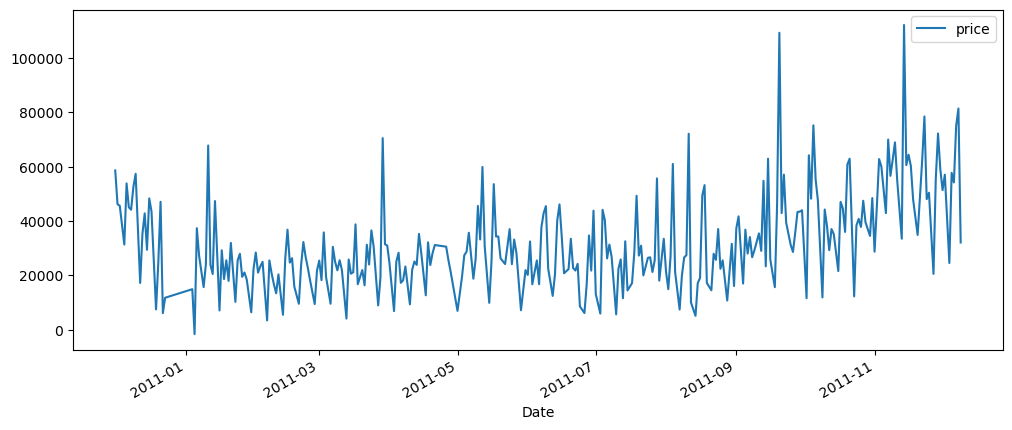

In [47]:
df_daily_sum.plot(figsize=(12,5))

In [53]:
df_daily_sum

,price
Date,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18
...,...
2011-12-05,57751.32
2011-12-06,54228.37
2011-12-07,75076.22


In [54]:
df_test = df_daily_sum.loc['2010-12-01':'2011-11-30']

In [55]:
df_test

,price
Date,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18
...,...
2011-11-25,50442.72
2011-11-27,20571.50
2011-11-28,55442.02


lets do the average for 30 days and try to predict it.
Simple moving average means taking the average of last 'n' days and giving it as a prediction.

In [56]:
df_test['predicted_price'] = df_test['price'].rolling(30).mean().shift(1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_21092\1934361375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_price'] = df_test['price'].rolling(30).mean().shift(1)


In [57]:
df_test

,price,predicted_price
Date,,
2010-12-01,58635.56,NaN
2010-12-02,46207.28,NaN
2010-12-03,45620.46,NaN
2010-12-05,31383.95,NaN
2010-12-06,53860.18,NaN
...,...,...
2011-11-25,50442.72,52210.371333
2011-11-27,20571.50,51793.086667
2011-11-28,55442.02,52068.723000


now that we have values we can see the difference by plotting graphs

<Axes: xlabel='Date'>

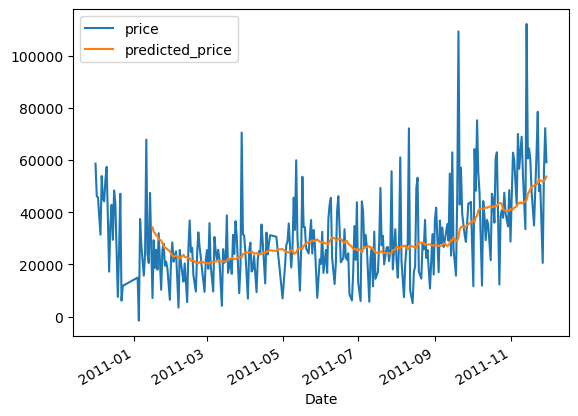

In [58]:
df_test[['price','predicted_price']].plot()

we can see that 3 month moving average is working as an average and giving a predictable value that is near to the real value. lets try 60 days.

In [59]:
df_test['predicted_price_60days'] = df_test['price'].rolling(60).mean().shift(1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_21092\642485712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_price_60days'] = df_test['price'].rolling(60).mean().shift(1)


<Axes: xlabel='Date'>

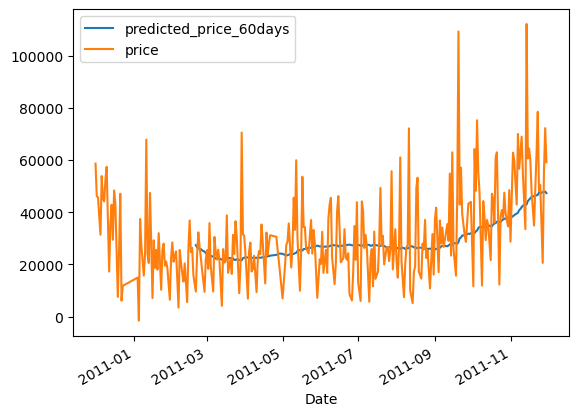

In [60]:
df_test[['predicted_price_60days','price']].plot()

even with 60days its kind of giving average.
Lets check and get the Error percentage in the last month of november.

In [71]:
df_error = df_test.loc['2011-11-01':'2011-11-30']

In [72]:
df_error['error_30'] = abs(((df_error['price']-df_error['predicted_price'])*100)/df_error['price'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_21092\3876868606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error['error_30'] = abs(((df_error['price']-df_error['predicted_price'])*100)/df_error['price'])


In [73]:
df_error['error_60'] = abs(((df_error['price']-df_error['predicted_price_60days'])*100)/df_error['price'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_21092\469524116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error['error_60'] = abs(((df_error['price']-df_error['predicted_price_60days'])*100)/df_error['price'])


In [74]:
df_error

,price,predicted_price,predicted_price_60days,error_30,error_60
Date,,,,,
2011-11-01,28741.55,41243.235000,38129.244867,43.496906,32.662452
2011-11-02,45239.06,41009.548000,38141.963867,9.349248,15.687983
2011-11-03,62816.55,41071.415333,38466.676533,34.616888,38.763468
2011-11-04,60081.76,41716.489333,38895.704033,30.567132,35.262043
2011-11-06,42912.40,42252.786333,39522.752033,1.537117,7.898994
2011-11-07,70001.08,43295.747000,39812.121533,38.149887,43.126418
2011-11-08,56647.66,43488.623667,40799.059867,23.229620,27.977502
2011-11-09,62599.43,43768.851000,41215.839200,30.081071,34.159402
2011-11-10,68956.24,43347.351000,41990.529700,37.137885,39.105540


we can see that for each day we have the error percentage. Sometimes maybe good, sometimes may be shit :)
This is because the data is variating alot and depends alot on the previous day data.
Basically it mean that more weighage should be on the just previous data rather than the equal that we are giving now.